# **Base de dados**

Este banco de dados foi disponibilizado pela instituição de ensino EBAC. O conjunto possui informações de 10127 clientes com perfil variado. Através da análise do banco, desejamos identificar o perfil dos clientes inadimplentes e elaborar uma estratégia para mitigar danos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")



In [2]:
leitura_df=pd.read_csv('/kaggle/input/analise-de-dados/Dados_bancarios.csv',na_values='na')
display(leitura_df)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


* Podemos visualizar que existem valores faltantes para alguns clientes

In [3]:
leitura_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

* Identificamos que as colunas *limite_credito e valor_transacoes_12m* estão com a tipificação errada, uma vez que nas colunas existem um float e não uma string

In [4]:
total,_=leitura_df.shape
adimplente,_=leitura_df[leitura_df['default']==0].shape
inadimplente,_=leitura_df[leitura_df['default']==1].shape
print(f'O percentual de clientes adimplente é de {round(100* adimplente / total ,2)}%')
print(f'O percentual de clientes inadimplente é de {round(100* inadimplente / total ,2)}%')

O percentual de clientes adimplente é de 83.93%
O percentual de clientes inadimplente é de 16.07%


* Como podemos visualizar, o percentual de clientes inadimplentes é de 16.07%

In [5]:
leitura_df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

* Aqui verificamos que as colunas escolaridade, estado_civil e salario_anual possuem valores faltantes.  

# **Limpeza de dados:**

In [6]:
leitura_df.dropna(inplace=True)

In [7]:
novo_total,_=leitura_df.shape
novo_adimplente,_=leitura_df[leitura_df['default']==0].shape
novo_inadimplente,_=leitura_df[leitura_df['default']==1].shape
print(f'O novo percentual de clientes adimplente é de {round(100* novo_adimplente / novo_total ,2)}%')
print(f'O percentual de clientes adimplente é de {round(100* adimplente / total ,2)}%')
print(f'O novo percentual de clientes inadimplente é de {round(100* novo_inadimplente / novo_total ,2)}%')
print(f'O percentual de clientes inadimplente é de {round(100* inadimplente / total ,2)}%')

O novo percentual de clientes adimplente é de 84.28%
O percentual de clientes adimplente é de 83.93%
O novo percentual de clientes inadimplente é de 15.72%
O percentual de clientes inadimplente é de 16.07%


* Verificamos que após a limpeza dos valores faltantes não houve impacto relevante no banco.

In [8]:
leitura_df[['limite_credito','valor_transacoes_12m']]

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
4,"4.716,22","816,08"
5,"4.010,69","1.088,07"
...,...,...
10120,"13.940,62","15.577,67"
10121,"3.688,95","14.596,49"
10122,"4.003,91","15.476,26"
10124,"5.409,16","10.291,78"


* Identificamos que a tipificação das duas colunas estão erradas pois não seguem as regras de pontuação Python 

In [9]:
fn=lambda valor:float(valor.replace('.','').replace(',','.'))

* Ajustando a pontuação de acordo com normas Python

In [10]:
leitura_df['limite_credito']=leitura_df['limite_credito'].apply(fn)
leitura_df['valor_transacoes_12m']=leitura_df['valor_transacoes_12m'].apply(fn)

In [11]:
leitura_df[['limite_credito','valor_transacoes_12m']]

,limite_credito,valor_transacoes_12m
0,12691.51,1144.90
1,8256.96,1291.45
2,3418.56,1887.72
4,4716.22,816.08
5,4010.69,1088.07
...,...,...
10120,13940.62,15577.67
10121,3688.95,14596.49
10122,4003.91,15476.26
10124,5409.16,10291.78


* Colunas ajustadas de acordo com a norma Python

In [12]:
leitura_df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


In [13]:
leitura_df.drop('id',axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,7081.0,0.157181,0.363997,0.00,0.00,0.00,0.00,1.00
idade,7081.0,46.347691,8.041225,26.00,41.00,46.00,52.00,73.00
dependentes,7081.0,2.337805,1.291649,0.00,1.00,2.00,3.00,5.00
meses_de_relacionamento,7081.0,35.981359,8.002609,13.00,31.00,36.00,40.00,56.00
qtd_produtos,7081.0,3.819376,1.544444,1.00,3.00,4.00,5.00,6.00
iteracoes_12m,7081.0,2.454456,1.104917,0.00,2.00,2.00,3.00,6.00
meses_inativo_12m,7081.0,2.342607,0.995104,0.00,2.00,2.00,3.00,6.00
limite_credito,7081.0,8493.259524,9126.082105,1438.00,2498.35,4287.22,10729.40,34516.99
valor_transacoes_12m,7081.0,4394.800669,3468.457771,510.16,2089.63,3831.09,4740.51,17995.49
qtd_transacoes_12m,7081.0,64.503319,23.809330,10.00,44.00,67.00,80.00,134.00


In [14]:
coluna='escolaridade'
titulos=['Escolaridade dos Cliente',
         'Escolaridade dos Clientes Adimplentes',
         'Escolaridade dos Cliente Inadimplentes']


In [15]:
adimplente_df=leitura_df[leitura_df['default']==0]
inadimplente_df=leitura_df[leitura_df['default']==1]

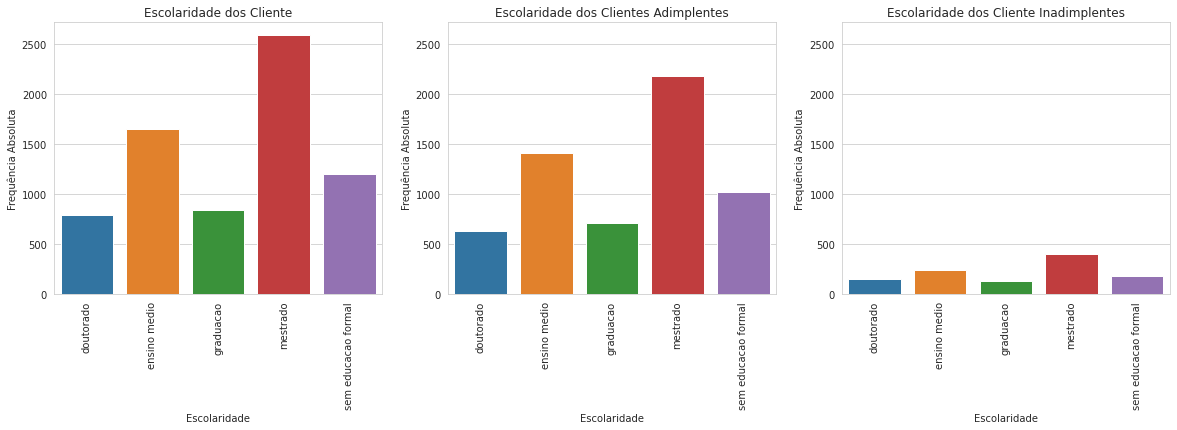

In [16]:
eixo=0
max_y=0 
max=leitura_df.select_dtypes('object').describe()[coluna]['freq']*1.1
figura, eixos=plt.subplots(1,3, figsize=(20,5),sharex=True)

for dataframe in [leitura_df,adimplente_df,inadimplente_df]:
  leitura_df_to_plot=dataframe[coluna].value_counts().to_frame()
  leitura_df_to_plot.rename(columns={coluna:'frequencia_absoluta'},inplace=True)
  leitura_df_to_plot[coluna]=leitura_df_to_plot.index
  leitura_df_to_plot.sort_values(by=[coluna], inplace=True)
  leitura_df_to_plot.sort_values(by=[coluna])

  f= sns.barplot(x=leitura_df_to_plot[coluna],y=leitura_df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(),ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(),rotation=90)
  _,max_y_f=f.get_ylim()
  max_y=max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0,max_y))
  eixo+=1

  figura.show()

* Não houve variação entre os gráficos

In [17]:
coluna='qtd_transacoes_12m'
titulos=['Qtd de transações dos clientes',
         'Qtd de transaçoes dos clientes adimplentes',
         'Qtd de transações do clientes inadimplentes']

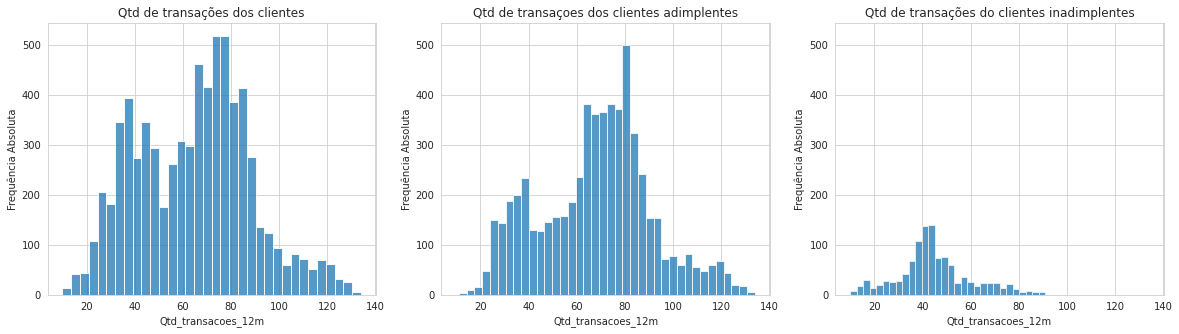

In [18]:
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [leitura_df, adimplente_df, inadimplente_df]:
  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1
figura.show()


* Idenficamos que o perfil dos clientes inadimplentes são daqueles que realizaram entre 30 a 50 transações

In [19]:
coluna='limite_credito'
titulos=['Limite de credito dos clientes',
         'Limite de credito dos clientes adimplentes',
         'Limite de credito dos cliente inadimplentes']

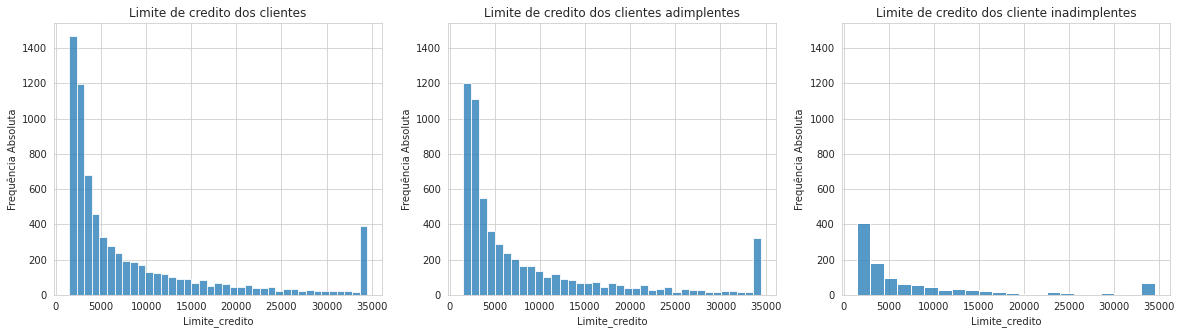

In [20]:
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [leitura_df, adimplente_df, inadimplente_df]:
  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1
figura.show()

* Não houve variação entre os gráficos

# **Conclusão**

Uma possível medida para mitigar os índices de inadimplência, é enviar um pop up com informativo de educação financeira para os clientes com transações entre 30 a 50.